<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Load-data-and-define-utility-functions" data-toc-modified-id="Load-data-and-define-utility-functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data and define utility functions</a></span><ul class="toc-item"><li><span><a href="#Utility-Functions-(will-move-to-utils.py-eventually)" data-toc-modified-id="Utility-Functions-(will-move-to-utils.py-eventually)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Utility Functions (will move to utils.py eventually)</a></span></li></ul></li><li><span><a href="#Holocene-GIA-model-weights" data-toc-modified-id="Holocene-GIA-model-weights-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Holocene GIA model weights</a></span><ul class="toc-item"><li><span><a href="#Load-and-shape-data" data-toc-modified-id="Load-and-shape-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Load and shape data</a></span><ul class="toc-item"><li><span><a href="#Plot-data" data-toc-modified-id="Plot-data-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Plot data</a></span></li></ul></li><li><span><a href="#Make-an-inference-using-a-single-GIA-model" data-toc-modified-id="Make-an-inference-using-a-single-GIA-model-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Make an inference using a single GIA model</a></span></li><li><span><a href="#Make-an-inference-using-a-single-GIA-model-(Sparse-Approx-VFE)" data-toc-modified-id="Make-an-inference-using-a-single-GIA-model-(Sparse-Approx-VFE)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Make an inference using a single GIA model (Sparse Approx VFE)</a></span></li><li><span><a href="#Run-GMSL-inference-model-for-each-GIA-model" data-toc-modified-id="Run-GMSL-inference-model-for-each-GIA-model-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Run GMSL inference model for each GIA model</a></span></li><li><span><a href="#Calculate-relative-model-weights-for-all-inferences" data-toc-modified-id="Calculate-relative-model-weights-for-all-inferences-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Calculate relative model weights for all inferences</a></span><ul class="toc-item"><li><span><a href="#Add-GIA-model-parameters-to-Dataframe" data-toc-modified-id="Add-GIA-model-parameters-to-Dataframe-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Add GIA model parameters to Dataframe</a></span></li><li><span><a href="#Save-dataframe-as-csv" data-toc-modified-id="Save-dataframe-as-csv-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Save dataframe as csv</a></span></li></ul></li><li><span><a href="#Summary-figure-showing-model-weightings-for-all-88-solid-Earth-parameterizations" data-toc-modified-id="Summary-figure-showing-model-weightings-for-all-88-solid-Earth-parameterizations-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Summary figure showing model weightings for all 88 solid Earth parameterizations</a></span></li><li><span><a href="#RMSE-check" data-toc-modified-id="RMSE-check-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>RMSE check</a></span></li><li><span><a href="#Log-marginal-likelihood-using-empirical-bayes" data-toc-modified-id="Log-marginal-likelihood-using-empirical-bayes-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Log marginal likelihood using empirical bayes</a></span></li></ul></li></ul></div>

# Imports

In [3]:
import numpy as np
from scipy.interpolate import interp1d, UnivariateSpline
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from scipy import ndimage
import arviz as az
import pandas as pd
from scipy.io import loadmat
from copy import copy
%matplotlib inline
import seaborn as sns
from PIL import Image
from scipy.cluster.vq import kmeans
import itertools

sns.set_style("ticks")
sns.set_context("talk")
import pymc3 as pm

from pathlib import Path

PROJECT_ROOT = Path.cwd().parents[0]
model_dir = PROJECT_ROOT / "model_outputs/"
data_dir = PROJECT_ROOT / "data/"
import warnings

warnings.filterwarnings("ignore")
from IPython.display import clear_output

import theano.tensor as tt
from theano import shared
from pymc3.distributions.dist_math import SplineWrapper

In [4]:
from datetime import datetime
from pathlib import Path
import sys
import seaborn as sns
from PIL import Image
import os
import numpy as np
from matplotlib import pyplot as plt
import scipy
from scipy import ndimage
from scipy.ndimage import zoom
from scipy.stats import chi2, gaussian_kde
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
import pandas as pd
import pickle
from PIL import Image
from scipy.ndimage import gaussian_filter as gaussian
from scipy.io import loadmat
from matplotlib.colors import ListedColormap
import datetime as dt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (
    RBF,
    ConstantKernel as C,
    Matern,
    WhiteKernel,
)
import matplotlib.dates as mdates
from osgeo import gdal
from gdalconst import GA_ReadOnly
import ogr
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pymc3 as pm
import theano
import theano.tensor as tt
import matplotlib.patches as patches


%matplotlib inline

import numpy as np
from scipy.interpolate import interp1d, UnivariateSpline
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from scipy import ndimage
import arviz as az
import pandas as pd
from scipy.io import loadmat
import scipy
from scipy.ndimage import gaussian_filter as gaussian
from copy import copy
import pickle
import os

%matplotlib inline
import seaborn as sns
from PIL import Image

sns.set_style("ticks")
sns.set_context("talk")
import pymc3 as pm

from pathlib import Path

PROJECT_ROOT = Path.cwd().parents[0]
model_dir = PROJECT_ROOT / "model_outputs/"
data_dir = PROJECT_ROOT / "data/"
import warnings

warnings.filterwarnings("ignore")
from IPython.display import clear_output

import theano.tensor as tt
from theano import shared
from pymc3.distributions.dist_math import SplineWrapper
from scipy.stats import gaussian_kde
import matplotlib.gridspec as gridspec

sns.set_palette("viridis", n_colors=6)
sns.set_style(
    "ticks",
    {
        "axes.edgecolor": ".3",
        "xtick.color": ".3",
        "ytick.color": ".3",
        "text.color": ".3",
        "axes.facecolor": "(.98,.98,.98)",
        "axes.grid": True,
        "grid.color": ".9",
        "grid.linestyle": u"-.",
    },
)
sns.set_context("talk")
theano.config.compute_test_value = "warn"
plt.rc("text", usetex=False)
plt.rc("font", family="sans-serif")
import netCDF4 # import libraries

# Load data and define utility functions
Load GIA Models

In [5]:
files=os.listdir(PROJECT_ROOT/'data/gia_models')

models = {}
for f in files:
    file = str(PROJECT_ROOT)+'/data/gia_models/'+f
    M = netCDF4.Dataset(file)

    lats = np.array(M.variables['LAT'][:])
    lons = np.array(M.variables['LON'][:])

    model_dims = [
        np.min(lons),
        np.max(lons),
        np.min(lats),
        np.max(lats),
    ]

    key=f[:-3]
    models[key]=[]
    for i in range(M.variables['RSL'][:].shape[0]):
        models[key].append(np.array(M.variables['RSL'][i,:,:].T))

age = np.array(M.variables['TIME'][:])
model_names = list(models.keys())

Load eustatic sea level curves

In [6]:
ESL_mat = loadmat(data_dir / "processed/ESL.mat")
Wael = ESL_mat["Wael_S"].ravel()
Wael_T = ESL_mat["Wael_T"].ravel()
Age_ESL = ESL_mat["age_com"].ravel()


Load land mask

In [7]:
im = Image.open('/limestone/jupyter/blake/bahamas-gia/data/processed/land_mask.tif')
imarray = np.array(im)
imarray_ext = [-180.00000000000003, 180.00000000000003, -85.05112880000001, 83.6664731]
landzoom = ndimage.zoom(imarray, 2, order=3)
my_grey = cm.Greys_r
my_grey.set_under("k", alpha=0)

## Utility Functions (will move to utils.py eventually)

In [8]:
def kmeans_inducing_points(n_inducing, X):
    # first whiten X
    if isinstance(X, tt.TensorConstant):
        X = X.value
    elif isinstance(X, (np.ndarray, tuple, list)):
        X = np.asarray(X)
    else:
        raise TypeError(("To use K-means initialization, "
                         "please provide X as a type that "
                         "can be cast to np.ndarray, instead "
                         "of {}".format(type(X))))
    scaling = np.std(X, 0)
    # if std of a column is very small (zero), don't normalize that column
#     scaling[scaling <= 1e-6] = 1.0
    Xw = X / scaling
    Xu, distortion = kmeans(Xw, n_inducing)
    return Xu * scaling

def make_mod(path, ice_model, lith, ages, extent):
    """combine model runs from local directory into xarray dataset."""
    # load files from path
    files = f'{path}*.nc'
    basefiles = glob.glob(files)
    modelrun = [key.split('output_', 1)[1][:-3].replace('.', '_') for key in basefiles]
    dss = xr.open_mfdataset(files,
                            chunks=None,
                            concat_dim='modelrun',
                            combine='nested')
    lats, lons, times = dss.LAT.values[0], dss.LON.values[0], dss.TIME.values[0]
    ds = dss.drop(['LAT', 'LON', 'TIME']).assign_coords(lat=lats,
                                                        lon=lons,
                                                        time=times * 1000,
                                                        modelrun=modelrun).rename({
                                                                      'time': 'age', 'RSL': 'rsl'})
    ds = ds.chunk({'lat': 10, 'lon': 10})
    #change lon from 0-360 to -180-180
    ds = ds.roll(lon=256, roll_coords=True)
    ds.coords['lon'] = pd.DataFrame((ds.lon[ds.lon >= 180] - 360)- 0.12 ) \
                                    .append(pd.DataFrame(ds.lon[ds.lon < 180]) + 0.58) \
                                    .reset_index(drop=True).squeeze()
    ds = ds.swap_dims({'dim_0': 'lon'}).drop('dim_0')
    #slice dataset to location
    ds = ds.rsl.sel(age=slice(ages[0], ages[-1]),
                    lon=slice(extent[0], extent[1]),
                    lat=slice(extent[3], extent[2]))
    return ds


def plot_status(dataframe,experiments,value):
    sns.set_context("paper")
    fig = plt.figure(figsize=(12, 12))

    if value=='hmc_divergence_pct':
        vmin=0
        vmax=100
        fun=np.array
    elif value=='weight':
        a=np.array(dataframe["weight"].values.astype(float))
        vmin=np.log(np.min(a[np.nonzero(a)]))
        vmax=0
        fun=np.log
    elif value=='rmse':
        vmin=dataframe['rmse'].min()
        vmax=dataframe['rmse'].max()
        fun=np.array
    elif value=='likelihood':
        vmin=dataframe['likelihood'].min()
        vmax=dataframe['likelihood'].max()
        fun=np.array
    else:
        vmin=0
        vmax=1
        fun=np.array
    axes = []
    for i in range(0, len(experiments)):
        experiment = experiments[i]
        axes.append(plt.subplot(6, 4, 1 + i))

        experiment = experiments[i]
        filtered = dataframe[
                (dataframe.ice_history == experiment[0])
                & (dataframe.deglacial_rate == experiment[1])
                & (dataframe.lithosphere == experiment[2])
            ]

        lmv = filtered["LMV"]/1e21
        umv = filtered["UMV"]/1e21
        vals = fun(filtered[value].values.astype(float))

        lmv_vals, lmv_idx = np.unique(lmv, return_inverse=True)
        umv_vals, umv_idx = np.unique(umv, return_inverse=True)
        vals_array = np.empty(lmv_vals.shape + umv_vals.shape)
        vals_array.fill(np.nan) # or whatever yor desired missing data flag is
        vals_array[lmv_idx, umv_idx] = vals
        vals_array=vals_array.T
        im=plt.imshow(vals_array,interpolation='nearest',cmap='viridis',vmin=vmin,vmax=vmax)
        _=plt.gca().set_yticks(np.arange(umv.unique().size))
        _=plt.gca().set_xticks(np.arange(lmv.unique().size))
        _=plt.gca().set_yticklabels(np.sort(umv.unique()))
        _=plt.gca().set_xticklabels(np.sort(lmv.unique().astype(int)))
        plt.gca().invert_yaxis()
        plt.gca().set_aspect(1)

        if i > len(experiments)-5:
            plt.gca().set_xlabel("LMV $10^{21}$ Pa·s")
        else:
            plt.gca().set_xticklabels([])
        if i % 4 == 0:
            plt.gca().set_ylabel("UMV\n$10^{21}$ Pa·s")
        else:
            plt.gca().set_yticklabels([])

        plt.minorticks_off()
        plt.gca().set_title('Lithosphere Thickness:' + str(experiment[2]) +' km')
        plt.gca().grid(False)
        
        style = {'lw':1,'c':'k'}
        plt.plot([-0.5,lmv.unique().size-.5],[1.5,1.5],**style)
        plt.plot([-0.5,lmv.unique().size-.5],[0.5,0.5],**style)
        plt.plot([-0.5,lmv.unique().size-.5],[2.5,2.5],**style)
        plt.plot([-0.5,lmv.unique().size-.5],[-0.5,-0.5],**style)
        for i in range(lmv.unique().size+1):
            plt.plot([-0.5+i,-0.5+i],[-.5,3.5],**style)


#     plt.suptitle(str(value)+' status by experiment',fontsize=10,y=.85)
#     cb=fig.colorbar(
#         im,
#         shrink=0.1,
#         label="log(Weight)",
#         ax=axes,
#         orientation="horizontal",
#         anchor=(-.35,-11),
#         aspect=3
#     )
#     cb.ax.xaxis.set_label_position('top')
#     fig.suptitle('Weight of each GIA model given the Holocene data',y=.755,x=.29)
    fig.tight_layout()
    fig.tight_layout(pad=0, w_pad=2, h_pad=-25)
    
    
    
    return fig

def inference_model_holocene(data, z_functions, init="adapt_full", target_accept=0.8, 
                              keys = ["index", "marine"], cores=4, chains=4, tune=1000, draws=1000, Sparse=False):
    with pm.Model() as model:

        ELEVATION = shared(data["elevation"].values)
        ELEVATION_U = shared(data["elevation_uncertainty"].values)

        age_sd = {}
        age = {}
        for key in keys:
            type_filter = data["type"] == key
            AGE = data[type_filter]["age"].values
            AGE_U = data[type_filter]["age_uncertainty"].values
            N = data[type_filter]["age"].size
            
            # age errors by data type
            if (key == "coral" or key == "index" or key == "marine"): #normal age errors
                age_sd[key] = pm.Normal(str(key + "_age_sd"), 0, 1, shape=(N))
                age[key] = pm.Deterministic(
                    str(key + "_age"), shared(AGE) + age_sd[key] * shared(AGE_U)
                )  # reshaped to improve Hamiltonian Monte Carlo
            else:
                print("data type not implemented or key error, check dataframe")

        # For holocene we force GMSL deviation from ESL curve to 0
        mean_fun = pm.gp.mean.Constant(0)
        if not Sparse:
            gp = pm.gp.Marginal(mean_func=mean_fun, cov_func=pm.gp.cov.Constant(0))
        else:
            gp = pm.gp.MarginalSparse(mean_func=mean_fun, cov_func=pm.gp.cov.Constant(0), approx='VFE')
            

        ages = [age[x] for x in keys]
        ages = pm.Deterministic("ages", tt.concatenate(ages))

        ## interpolation of simulated age for GIA correction
        N = data["age"].size
        GIA = tt.zeros(N, dtype="float64")
        for i in range(N):
            GIA = tt.set_subtensor(GIA[i], SplineWrapper(z_functions[i])(ages[i]))
        gia_collect = pm.Deterministic(
            "GIA", GIA
        )  # samples of GIA model RSL (includes Wael)

        ## add water depth to GIA by data type
        water_depth_sd = {}
        water_depth = {}
        for key in keys:
            type_filter = data["type"] == key
            N = data[type_filter]["age"].size

            # custom water depth by data type (indicative range)
            if key == "marine":
                water_depth[key] = pm.HalfFlat(str(key + "_water_depth"), shape=(N))
#                 mean = 2
#                 lam=5 
#                 max_depth= 6
#                 rescale = max_depth/lam
#                 lam = np.ones(N)*lam
#                 water_depth[key] = pm.Wald(
#                     str(key + "_water_depth"), mu=mean, lam=lam, shape=(N)
#                 )
#                 water_depth[key]=water_depth[key]*rescale
                

            elif (key == "highstand" or key == "index"): #no added water depth
                water_depth[key] = pm.Deterministic(
                    str(key + "_water_depth"), shared(np.zeros(N))
                )
            else:
                print("data type not implemented or key error, check dataframe")

        ## long term subsidence
        ## collect all through concat
        water_depths = [water_depth[x] for x in keys]
        water_depths = pm.Deterministic("water_depths", tt.concatenate(water_depths))

        # master equation:
        # GMSL = Elevation observation +/- elevation uncertainty +/- water depth - GIA + SUBSIDENCE
        # keep in mind its solving for change in GMSL from the GMSL used in GIA model
        elevations_sd = pm.Normal("elev_sd", 0, 1, shape=(data['age'].size))
        elevations = pm.Deterministic("elev", ELEVATION + elevations_sd * ELEVATION_U)
        
        gmsl_points = pm.Deterministic(
            "gmsl_points", elevations + water_depths - GIA.flatten()
        )
        
        noise = pm.HalfStudentT('noise',nu=1,sigma=1)
        if not Sparse:
            gmsl_inference = gp.marginal_likelihood(
                "gmsl",
                X=ages[:, np.newaxis],
                y=gmsl_points,
                shape=((N),),
                noise=noise,
            )  # GMSL deviation from Wael (esl)
        else:
            Xu=kmeans_inducing_points(20, data["age"].values) #20 is N
            gmsl_inference = gp.marginal_likelihood(
                "gmsl",
                X=ages[:, np.newaxis],
                Xu=Xu,
                y=gmsl_points,
                shape=((N),),
                noise=noise,
            )  # GMSL deviation from Wael (esl)
        
        trace = pm.sample(tune=tune,draws=draws,
            init=init, progressbar=True, cores=cores, target_accept=target_accept, chains=chains
        )
        az_trace = az.convert_to_inference_data(trace)
    return az_trace, trace, model, gp

def interpolation_functions_holocene(LAT, LON, GIA_MODEL):
    island_Zs = [
        [lookup_z(lat, lon, m, model_dims) for lat, lon in zip(LAT, LON)]
        for m in GIA_MODEL
    ]
    
#     age = np.array([0, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    age = np.array([26. , 25. , 24. , 23. , 22. , 21. , 20.5, 20. , 19.5, 19. , 18.5,
       18. , 17.5, 17. , 16.5, 16. , 15.5, 15. , 14.5, 14. , 13.5, 13. ,
       12.5, 12. , 11.5, 11. , 10.5, 10. ,  9.5,  9. ,  8.5,  8. ,  7.5,
        7. ,  6.5,  6. ,  5.5,  5. ,  4.5,  4. ,  3.5,  3. ,  2.5,  2. ,
        1.5,  1. ,  0.5,  0. ])
    order = np.argsort(age)
    island_Zs = np.array(island_Zs)

    Zfuns = []
    for k in range(island_Zs.shape[1]):
        rsl_function =  UnivariateSpline(age[order], island_Zs[:, k][order], k=1, ext=3, s=0)
        
        Zfuns.append(
            rsl_function
        )  ## 3 returns boundary value at extrapolation
    return Zfuns

def logistic(x, a, x0):
    # a is the slope, x0 is the location
    return pm.math.invlogit(a*(x - x0))


def filtered_posteriors(include,comparison):
    if not isinstance(include, list): 
        include=[include]
    new_comparison={}
    for key in list(comparison.keys()):
        if any(x in key for x in include):
            new_comparison[key]=copy(comparison[key])
    return new_comparison   

def plot_gmsl_inference(X_new,inference,color,ax,max_like):
    
    bot = np.nanpercentile(inference, 2.5, axis=0)
    top = np.nanpercentile(inference, 97.5, axis=0)

    max_like = gaussian(max_like,1)

    ax.fill_between(
            X_new.ravel(),
            bot,
            top,
            fc=(1,1,1),
            zorder=2,
            alpha=1,
            lw=0,
            ec=color,
            aa=True,
            capstyle="round",
        )
    ax.fill_between(
            X_new.ravel(),
            bot,
            top,
            fc=color,
            zorder=3,
            alpha=.1,
            lw=0,
            ec=color,
            aa=True,
            capstyle="round",
        )
    ax.fill_between(
        X_new.ravel(),
        bot,
        top,
        fc='none',
        zorder=4,
        alpha=1,
        lw=1.5,linestyle='--',
        ec=color,
        aa=True,
        capstyle="round",#hatch=''
    )
    
    bot = np.nanpercentile(inference, 33/2, axis=0)
    top = np.nanpercentile(inference, 100-33/2, axis=0)
    
    ax.fill_between(
        X_new.ravel(),
        bot,
        top,
        fc=color,
        zorder=3,
        alpha=.1,
        lw=0,
        ec=color,
        aa=True,
        capstyle="round",
    )
    
    ax.fill_between(
        X_new.ravel(),
        bot,
        top,
        fc='none',
        zorder=4,
        alpha=1,
        lw=1.5,linestyle='-',
        ec=color,
        aa=True,
        capstyle="round",#hatch=''
    )
    
    ## make legend here
    plt.plot([],[],color=color,lw=1.5,linestyle='--',label='95% GMSL envelope')
    plt.plot([],[],color=color,lw=1.5,linestyle='-',label='66% GMSL envelope')
    plt.plot([],[],color=color,lw=4,label='Most likely GMSL')
    

    
    lig_only=((X_new<128) & (X_new>117)).ravel()
    ax.plot(X_new[lig_only],max_like[lig_only],
             zorder=13,color=color,lw=4)
    ax.legend(loc="best", frameon=True, fontsize=8)

    return ax

def model_import_new(output_dir = "get_GIA/output_newice/"):

 
    lats = pd.read_csv(model_dir / "get_GIA/lats", delimiter=",", header=None)
    lons = pd.read_csv(model_dir / "get_GIA/lons", delimiter=",", header=None)
    directory = model_dir / output_dir
    age = np.arange(115, 131, 1)

    extent = [0, 1, 0, 1]
    model_dims = [
        np.min(lons.values),
        np.max(lons.values),
        np.min(lats.values),
        np.max(lats.values),]

    files = np.sort(os.listdir(directory))
    files = [f for f in files if f[0] != "."]  # ignores .ds_store

    model_names = []
   
    for f in files:
        model_names.append(
            f.split("_")[0]
            + "_"
            + f.split("_")[1]
            + "_"
            + f.split("_")[2]
            + "_"
            + f.split("_")[3]
            + "_"
            + f.split("_")[4]
        )

    num_of_models = np.unique(model_names).size
    model_names = np.unique(model_names)


    model_names=np.array(['output'+str(f[10:]) for f in model_names])
        
    models = []

    for i in range(0, len(files), int(len(files) / model_names.size)):
        model = []
        for k in range(int(len(files) / model_names.size)):
            model.append(
                pd.read_csv(
                    str(directory) + "/" + files[i + k], delimiter=",", header=None
                )
            )
        models.append(model)


    return models, model_names
    
def inference_model_real_data(data, z_functions, init="adapt_full", target_accept=0.8, 
                              keys = ["coral", "highstand"], cores=4, chains=4, tune=1000, draws=1000):
    with pm.Model() as model:

        ELEVATION = shared(data["elevation"].values)
        ELEVATION_U = shared(data["elevation_uncertainty"].values)

        age_sd = {}
        age = {}
        for key in keys:
            type_filter = data["type"] == key
            AGE = data[type_filter]["age"].values
            AGE_U = data[type_filter]["age_uncertainty"].values
            N = data[type_filter]["age"].size
            
            # age errors by data type
            if (key == "coral" or key == "index"): #normal age errors
                age_sd[key] = pm.Normal(str(key + "_age_sd"), 0, 1, shape=(N))
                age[key] = pm.Deterministic(
                    str(key + "_age"), shared(AGE) + age_sd[key] * shared(AGE_U)
                )  # reshaped to improve Hamiltonian Monte Carlo
            elif key == "highstand":
                age_sd[key] = pm.Wald(str(key + "_age_sd"), mu=2, lam=5, shape=(N))
                age[key] = pm.Deterministic(
                    str(key + "_age"), shared(AGE)-1 + age_sd[key]
                )  # reshaped to improve Hamiltonian Monte Carlo
#                 age[key] = pm.Uniform(str(key + "_age"), lower=117, upper=128, shape=(N))
            else:
                print("data type not implemented or key error, check dataframe")

        ## Gaussian Process Kernels
        gp_ls = pm.Wald("gp_ls", mu=2, lam=5, shape=1)
        gp_var = pm.Normal("gp_var", mu=0, sd=5, shape=1)
        m_gmsl = pm.Normal("m_gmsl", 0, 10)
        mean_fun = pm.gp.mean.Constant(m_gmsl)
        

        cov1 = gp_var[0] * pm.gp.cov.ExpQuad(1, gp_ls[0])

        
#         ls = pm.Gamma(
#             "ls", alpha=1, beta=1, shape=(2, 1)
#         )  # lengthscale of cov for white noise and matern
#         yls = pm.Gamma("constY", alpha=1, beta=1)  # signal variance
#         meany = pm.Normal("meanY", mu=0, sd=15)  # mean of GMSL over interval

#         cov = yls * pm.gp.cov.Matern32(1, ls=ls[0]) + ls[1] * pm.gp.cov.WhiteNoise(1) * gp_var[0] * pm.gp.cov.ExpQuad(1, gp_ls[0])

        
        gp = pm.gp.Marginal(mean_func=mean_fun,cov_func=cov1)
#         gp = pm.gp.Latent(mean_func=mean_fun,cov_func=cov1)
        
        ## collect ages from all types of data
        ages = [age[x] for x in keys]
        ages = pm.Deterministic("ages", tt.concatenate(ages))

        ## interpolation of simulated age for GIA correction
        N = data["age"].size
        GIA = tt.zeros(N, dtype="float64")
        for i in range(N):
            GIA = tt.set_subtensor(GIA[i], SplineWrapper(z_functions[i])(ages[i]))
        gia_collect = pm.Deterministic(
            "GIA", GIA
        )  # samples of GIA model RSL (includes Wael)

        ## add water depth to GIA by data type
        water_depth_sd = {}
        water_depth = {}
        for key in keys:
            type_filter = data["type"] == key
            N = data[type_filter]["age"].size

            # custom water depth by data type (indicative range)
            if key == "coral":
                mean = 2
                lam=5 
                max_depth= data[type_filter]["water depth max (m)"]
                rescale = max_depth/lam
                mean_conversion = data[type_filter]["water depth mean (m)"]/rescale
                lam = np.ones(N)*lam
                water_depth[key] = pm.Wald(
                    str(key + "_water_depth"), mu=mean, lam=lam, shape=(N)
                )
                water_depth[key]=water_depth[key]*rescale

            elif (key == "highstand" or key == "index"): #no added water depth
                water_depth[key] = pm.Deterministic(
                    str(key + "_water_depth"), shared(np.zeros(N))
                )
            else:
                print("data type not implemented or key error, check dataframe")

        ## long term subsidence
        subsidence = pm.Normal("subsidence", 2.5, 0.1)
        ## collect all through concat
        water_depths = [water_depth[x] for x in keys]
        water_depths = pm.Deterministic("water_depths", tt.concatenate(water_depths))

        # master equation:
        # GMSL = Elevation observation +/- elevation uncertainty +/- water depth - GIA + SUBSIDENCE
        # keep in mind its solving for change in GMSL from the GMSL used in GIA model

        
        
        elevations_sd = pm.Normal("elev_sd", 0, 1, shape=(data['age'].size))
        elevations = pm.Deterministic("elev", ELEVATION + elevations_sd * ELEVATION_U)
        
        gmsl_points = pm.Deterministic(
            "gmsl_points", elevations + subsidence + water_depths - GIA.flatten()
        )
        
        noise = pm.HalfStudentT('noise',nu=1,sigma=1)
        gmsl_inference = gp.marginal_likelihood(
            "gmsl",
            X=ages[:, np.newaxis],
            y=gmsl_points,
            shape=((N),),
            noise=noise,
        )  # GMSL deviation from Wael (esl)
        
#         gmsl_inference = gp.prior(
#             "gmsl",
#             X=ages[:, np.newaxis],
#             shape=((data["elevation"].values.size),),
#         )  # GMSL deviation from Wael (esl)
        
#         elev = pm.Deterministic("obs_pred", gmsl_inference - subsidence - water_depths + GIA.flatten())

#         y_ = pm.Normal("y", mu=elev, sd=ELEVATION_U, observed=ELEVATION)
        
    
        trace = pm.sample(tune=tune,draws=draws,
            init=init, progressbar=True, cores=cores, target_accept=target_accept, chains=chains
        )
        az_trace = az.convert_to_inference_data(trace)
    return az_trace, trace, model, gp


def weighted_trace(pred_list, comp, var="f_pred"):
    new_weights = comp['weight'].values.astype(float)
    new_weights = np.repeat(new_weights, pred_list[comp.index.values[0]]['f_pred'].shape[0], axis=0)
    new_weights = new_weights / np.sum(new_weights)

    test = [pred_list[p][var] for p in comp.index.values]
    C = np.random.choice(np.arange(np.vstack(test).shape[0]), 20000, p=new_weights)
    weighted_trace = np.vstack(test)[C, :]

    return weighted_trace


def inference_model(data, z_functions):
    with pm.Model() as model:
        age_sd = pm.Normal("age_sd", 0, 1, shape=(data["lat"].size))
        age = pm.Deterministic(
            "age", shared(data["age"]) + age_sd * shared(data["age_uncertainty"])
        )  # reshaped to improve Hamiltonian Monte Carlo

        ## Gaussian Process Kernels
        matern_ls = pm.HalfCauchy("matern_ls", 1)
        matern_var = pm.HalfCauchy("matern_var", 1)
        m_gmsl = pm.Normal("m_gmsl", 0, 50)
        mean_fun = pm.gp.mean.Constant(m_gmsl)
        cov = matern_var * pm.gp.cov.Matern32(1, matern_ls)
        gp = pm.gp.Marginal(mean_func=mean_fun, cov_func=cov)

        GIA = tt.zeros(data["lat"].size, dtype="float64")
        for i in range(data["lat"].size):
            GIA = tt.set_subtensor(GIA[i], SplineWrapper(z_functions[i])(age[i]))
        gia_collect = pm.Deterministic(
            "GIA", GIA
        )  # samples of GIA model RSL (includes Wael)

        gmsl_inference = gp.marginal_likelihood(
            "gmsl",
            X=age[:, np.newaxis],
            y=data["elevation"] - GIA.flatten(),
            shape=((N),),
            noise=data["elevation_uncertainty"],
        )  # GMSL deviation from Wael
        trace = pm.sample(init="adapt_full", progressbar=True, cores=4)
        az_trace = az.convert_to_inference_data(trace)
    return az_trace, trace, model, gp


def interpolation_functions(LAT, LON, GIA_MODEL, ESL, ESL_AGE):
    island_Zs = [
        [lookup_z(lat, lon, m.values, model_dims) for lat, lon in zip(LAT, LON)]
        for m in GIA_MODEL
    ]
    
    esl_fun = UnivariateSpline(ESL_AGE, ESL, k=1, ext=3, s=0)
    island_Zs = np.array(island_Zs)

    #     ESL[(ESL_AGE >= LIG_END) & (ESL_AGE <= LIG_START)] = 0  # remove GIA splice

    Zfuns = []
    for k in range(island_Zs.shape[1]):
        RSL = np.copy(ESL)
        rsl_function =  UnivariateSpline(np.arange(115, 131), island_Zs[:, k], k=1, ext=3, s=0)
        
        
        GIA = rsl_function(ESL_AGE)-esl_fun(ESL_AGE)

        Zfuns.append(
            UnivariateSpline(ESL_AGE, GIA, k=1, ext=3, s=0)
        )  ## 3 returns boundary value at extrapolation
    return Zfuns


def lookup_z(lat, lon, model, model_dims):
    """
    Returns the RSL prediction at a specific lat, lon, on a specific GIA model timeslice.
    Parameters
    ----------
    lat: Latitude value
    lon: Longitude value
    model: A 2d matrix from a GIA model output representing a single timeslice.
    model_dims: The real word lat/lon dimensions of the model. [left, right, top, bottom]
    Returns
    -------
    The model RSL prediction nearest the lat, lon pair.
    """
    lat_len = model.shape[0]
    lon_len = model.shape[1]
    lon_list = np.linspace(model_dims[0], model_dims[1], lon_len)
    lat_list = np.linspace(model_dims[3], model_dims[2], lat_len)
    lon_id = np.argmin(
        np.abs(np.linspace(model_dims[0], model_dims[1], lon_len) - (lon))
    )
    lat_id = np.argmin(
        np.abs(np.linspace(model_dims[3], model_dims[2], lat_len) - (lat))
    )
    return model[lat_id, lon_id]

# Holocene GIA model weights

In this notebook, we will load holocene data, run the GMSL inference model forcing ESL to match the GIA model, and then incorporate the model weights into the LIG Bayesian Model Averaging analysis.

## Load and shape data
Data values are pulled from a master data table.

In [9]:
data=pd.concat([pd.read_csv(PROJECT_ROOT/'data/processed/rsl_north_england.csv'),
pd.read_csv(PROJECT_ROOT/'data/processed/rsl_denmark_netherlands.csv'),
pd.read_csv(PROJECT_ROOT/'data/processed/rsl_english_channel.csv')])

In [10]:
data['age'] = data['age']/1000
data=data.rename(columns={'age_er': 'age_uncertainty','rsl':'elevation','rsl_er':'elevation_uncertainty'})
data['age_uncertainty'] = data['age_uncertainty']/1000
# to 1 sigma
data['age_uncertainty'] = data['age_uncertainty']/2
data['elevation_uncertainty'] = data['elevation_uncertainty']/2
data['type']='index'

### Plot data

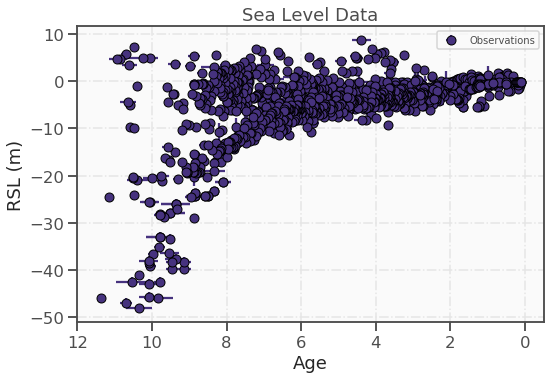

In [11]:
sns.set_context("talk")
fig = plt.figure(figsize=(8, 10))
plt.subplot(2, 1, 1)
plt.errorbar(
    data["age"],
    data["elevation"],
    xerr=data["age_uncertainty"],
    yerr=data["elevation_uncertainty"],
    linestyle="none",
    label="Observations",
    marker='o',mec='k'
)

#to get half age errors, use this format: xerr=[np.zeros(hs_ages_o.size), np.repeat(4, hs_ages_o.size)],

plt.legend(loc="best", frameon=True,fontsize=10)


plt.gca().set_xlabel("Age")
plt.gca().set_ylabel("RSL (m)")
_ = plt.gca().set_title("Sea Level Data")
# plt.gca().set_xlim([LIG_END, LIG_START+2])
plt.gca().invert_xaxis()

fig.tight_layout()

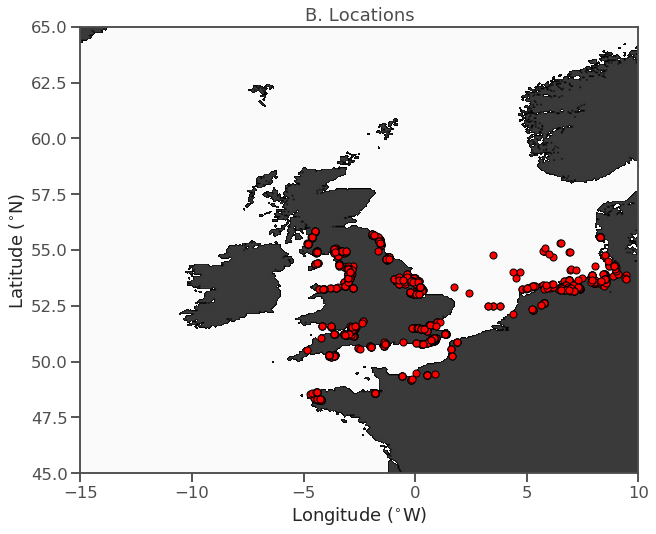

In [12]:
plt.figure(figsize=(10,10))

plt.imshow(
    landzoom,
    interpolation="gaussian",
    cmap=my_grey,
    vmin=0.1,
    vmax=5,
    extent=imarray_ext,
)

plt.scatter(data['lon'],data['lat'],s=50,edgecolor='k',lw=1, alpha=1, facecolor='r')
plt.gca().set_title("B. Locations")
plt.gca().grid(False)
plt.gca().set_xlim(-15,10)
plt.gca().set_ylim(45,65)
_=plt.gca().set_ylabel("Latitude ($^{\circ}$N)")
_=plt.gca().set_xlabel("Longitude ($^{\circ}$W)")

## Make an inference using a single GIA model
Code block for diagnosing issues or looking at a specific output.

In [13]:
md_id = 10

In [14]:
data2 = data.copy()
data2['lon']=[a+360 if a<0 else a for a in data2['lon']]
data2 = data2.sample(frac=.25) #300 samples
N = data["elevation"].size
data2=data2.sort_values(['type'])
keys = list(data2['type'].unique())
model_choice = model_names[md_id]

GIA_MODEL = models[model_choice]

z_functions = interpolation_functions_holocene(
    data2["lat"].values, data2["lon"].values, GIA_MODEL
)

# to avoid a strange linux locking bug for HMC, use cores = 1 when dataset is large
az_trace, trace, model, gp = inference_model_holocene(
    data2,
    z_functions,
    target_accept=0.9,
    cores=1,chains=1,
    keys=keys,
    init="adapt_full",
    tune=500,
    draws=500,
)

WARNING (theano.gof.compilelock): Overriding existing lock by dead process '30070' (I am process '31353')
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_full...
Sequential sampling (1 chains in 1 job)
NUTS: [noise, elev_sd, index_age_sd]


Sampling 1 chain for 500 tune and 500 draw iterations (500 + 500 draws total) took 397 seconds.
The acceptance probability does not match the target. It is 0.7822862966776892, but should be close to 0.9. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [15]:
X_new = np.linspace(12, 0, 200)[:, np.newaxis]

with model:  # pymc3 model context
    # add conditional to each model (comment out if running this cell twice)
    f_pred = gp.conditional("f_pred", X_new,pred_noise=False)

In [16]:
pred_samples = pm.sample_posterior_predictive(
    trace,  # if using pymc3 trace remove '.posterior'
    model=model,
    var_names=['f_pred'],
    samples=1000,
)

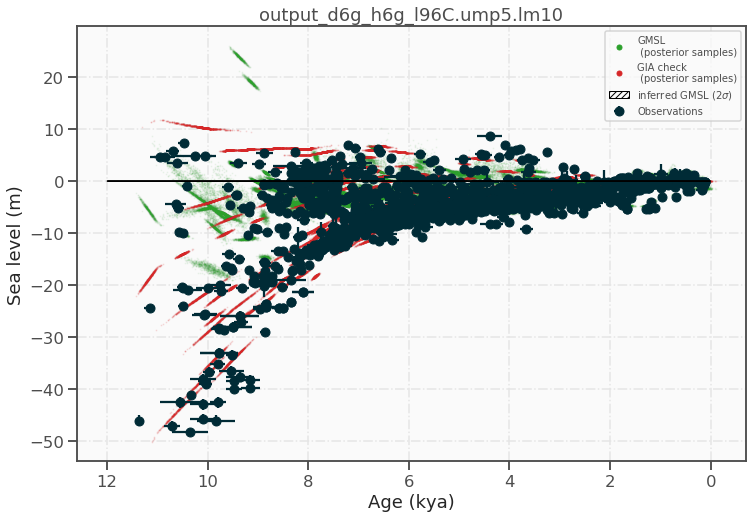

In [17]:
cs = sns.color_palette('tab10')
i = model_choice

plt.figure(figsize=(12, 8))
plt.plot(
    az_trace.posterior["ages"].values.ravel(),
    az_trace.posterior["gmsl_points"].values.ravel(),
    ".",
    markersize=2,
    alpha=.05,color=cs[2]
)
plt.plot(
    [],[],
    ".",
    markersize=10,
    alpha=1,
    color=cs[2],
    label="GMSL\n (posterior samples)",
)
plt.plot(
    az_trace.posterior["ages"].values.ravel(),
    az_trace.posterior["GIA"].values.ravel(),
    ".",
    markersize=2,
    alpha=0.1,color=cs[3],
)
plt.plot(
    [],[],
    ".",
    markersize=10,
    alpha=1,
    color=cs[3],
    label="GIA check\n (posterior samples)",
)

plt.errorbar(
    data["age"],
    data["elevation"],
    xerr=data["age_uncertainty"],
    yerr=data["elevation_uncertainty"],
    marker="o",
    linestyle="none",
    label="Observations",
    color="#002b36",
    zorder=10,
)

inference = pred_samples["f_pred"]
bot = np.nanpercentile(inference, 2.5, axis=0)
top = np.nanpercentile(inference, 97.5, axis=0)
dy=np.linspace(-5,15,100)
# max_like = [dy[np.argmax(scipy.stats.gaussian_kde(inference[:,i])(dy))] for i in range(X_new.size)]
# max_like = gaussian(max_like,3)

plt.gca().fill_between(
    X_new.ravel(),
    bot,
    top,
    fc="none",
    zorder=15,
    alpha=1,
    label="inferred GMSL (2$\sigma$)",
    lw=1,
    ec=(0,0,0),
    aa=True,
    capstyle="round",
    hatch="////",
)

# plt.plot(X_new,max_like,lw=3,color='k')

# for k in range(15,300):
#     plt.plot(X_new,pred_samples['f_pred'][k,:],color='k',alpha=.1,lw=1,rasterized=True)

plt.legend(loc='best',fontsize=10)
# plt.plot(X_new,mean,color='k')
# plt.gca().set_ylim(-5, 20)
# plt.gca().set_xlim(12, 0)
plt.gca().invert_xaxis()
_=plt.gca().set_title(model_names[md_id])
plt.gca().set_xlabel('Age (kya)')
_=plt.gca().set_ylabel('Sea level (m)')

A better GIA model will place more of the green dots (GMSL deviation posterior) on 0.

## Make an inference using a single GIA model (Sparse Approx VFE)
Code block for diagnosing issues or looking at a specific output.

In [18]:
md_id = 10

In [19]:
data2 = data.copy()
data2['lon']=[a+360 if a<0 else a for a in data2['lon']]
data2 = data2.sample(100)
N = data["elevation"].size
data2=data2.sort_values(['type'])
keys = list(data2['type'].unique())
model_choice = model_names[md_id]

GIA_MODEL = models[model_choice]

z_functions = interpolation_functions_holocene(
    data2["lat"].values, data2["lon"].values, GIA_MODEL
)

# to avoid a strange linux locking bug for HMC, use cores = 1 when dataset is large
az_trace, trace, model, gp = inference_model_holocene(
    data2,
    z_functions,
    target_accept=0.8,
    cores=1,chains=1,
    keys=keys,
    init="adapt_full",
    tune=500,
    draws=500,Sparse=True
)

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_full...
Sequential sampling (1 chains in 1 job)
NUTS: [noise, elev_sd, index_age_sd]


Sampling 1 chain for 500 tune and 500 draw iterations (500 + 500 draws total) took 62 seconds.
The acceptance probability does not match the target. It is 0.6133411502199224, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [20]:
X_new = np.linspace(12, 0, 200)[:, np.newaxis]

with model:  # pymc3 model context
    # add conditional to each model (comment out if running this cell twice)
    f_pred = gp.conditional("f_pred", X_new,pred_noise=False)

In [21]:
pred_samples = pm.sample_posterior_predictive(
    trace,  # if using pymc3 trace remove '.posterior'
    model=model,
    var_names=['f_pred'],
    samples=1000,
)

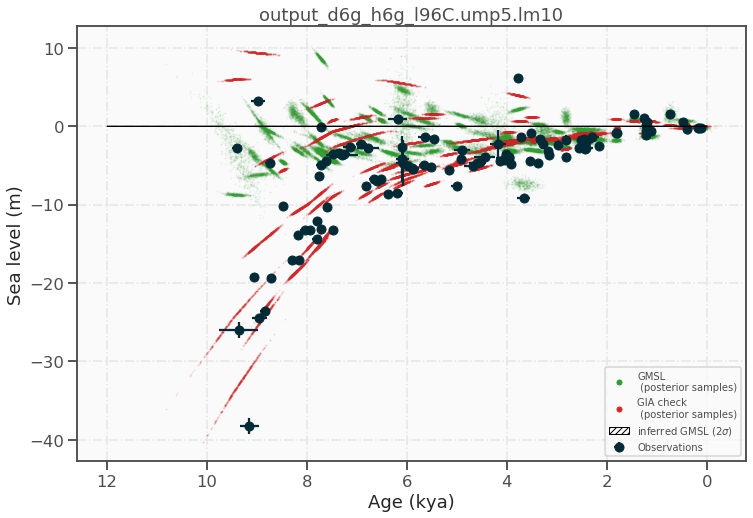

In [22]:
cs = sns.color_palette('tab10')
i = model_choice

plt.figure(figsize=(12, 8))
plt.plot(
    az_trace.posterior["ages"].values.ravel(),
    az_trace.posterior["gmsl_points"].values.ravel(),
    ".",
    markersize=2,
    alpha=.05,color=cs[2]
)
plt.plot(
    [],[],
    ".",
    markersize=10,
    alpha=1,
    color=cs[2],
    label="GMSL\n (posterior samples)",
)
plt.plot(
    az_trace.posterior["ages"].values.ravel(),
    az_trace.posterior["GIA"].values.ravel(),
    ".",
    markersize=2,
    alpha=0.1,color=cs[3],
)
plt.plot(
    [],[],
    ".",
    markersize=10,
    alpha=1,
    color=cs[3],
    label="GIA check\n (posterior samples)",
)

plt.errorbar(
    data2["age"],
    data2["elevation"],
    xerr=data2["age_uncertainty"],
    yerr=data2["elevation_uncertainty"],
    marker="o",
    linestyle="none",
    label="Observations",
    color="#002b36",
    zorder=10,
)

inference = pred_samples["f_pred"]
bot = np.nanpercentile(inference, 2.5, axis=0)
top = np.nanpercentile(inference, 97.5, axis=0)
dy=np.linspace(-5,15,100)
# max_like = [dy[np.argmax(scipy.stats.gaussian_kde(inference[:,i])(dy))] for i in range(X_new.size)]
# max_like = gaussian(max_like,3)

plt.gca().fill_between(
    X_new.ravel(),
    bot,
    top,
    fc="none",
    zorder=15,
    alpha=1,
    label="inferred GMSL (2$\sigma$)",
    lw=1,
    ec=(0,0,0),
    aa=True,
    capstyle="round",
    hatch="////",
)

# plt.plot(X_new,max_like,lw=3,color='k')

# for k in range(15,300):
#     plt.plot(X_new,pred_samples['f_pred'][k,:],color='k',alpha=.1,lw=1,rasterized=True)

plt.legend(loc='best',fontsize=10)
# plt.plot(X_new,mean,color='k')
# plt.gca().set_ylim(-5, 20)
# plt.gca().set_xlim(12, 0)
plt.gca().invert_xaxis()
_=plt.gca().set_title(model_names[md_id])
plt.gca().set_xlabel('Age (kya)')
_=plt.gca().set_ylabel('Sea level (m)')

A better GIA model will place more of the green dots (GMSL deviation posterior) on 0.

## Run GMSL inference model for each GIA model

In [23]:
# We are not worried about penultimate deglacial rates or penultimate glacial ice histories -- only solid Earth model parameters
models_to_run = [m for m in model_names if (('l71' in m) or ('l96' in m))]

In [24]:
N = data["elevation"].size
comparison = {}
stats_models = {}
gps = {}
traces = {}

data2 = data.copy()
data2['lon']=[a+360 if a<0 else a for a in data2['lon']]
data2 = data2.sample(frac=.5) #600 samples
N = data["elevation"].size
data2=data2.sort_values(['type'])
keys = list(data2['type'].unique())

In [34]:
for i,k in enumerate(models_to_run):
    if k not in comparison.keys():
        clear_output(wait=True)
        print("running simulation number " + str(i + 1) + " of " + str(len(models_to_run)))
        print("running model: " + k)

        GIA_MODEL = models[k]
        ESL_CURVE = np.copy(Wael)

        z_functions = interpolation_functions_holocene(
            data2["lat"].values, data2["lon"].values, GIA_MODEL
        )

        az_trace, trace, model, gp = inference_model_holocene(
        data2,
        z_functions,
        target_accept=0.8,
        cores=1,chains=1,
        keys=keys,
        init="auto",
        tune=500,
        draws=500, Sparse=True)

        comparison[k] = az_trace
        stats_models[k] = model
        gps[k] = gp
        traces[k] = trace

running simulation number 85 of 88
running model: output_d6g_h6g_l96C.ump4.lm8


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [noise, elev_sd, index_age_sd]


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Calculate relative model weights for all inferences 
We use leave-one-out (loo) cross validation with an Akaike-type weighting. The weights are stabilized using a Bayesian bootstrap. https://arviz-devs.github.io/arviz/generated/arviz.compare.html

In [35]:
comp = pm.compare(comparison, ic="loo", b_samples=100000, method='BB-pseudo-BMA') #overkill on samples, but it is fast enough

In [36]:
comp

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
output_d6g_h6g_l96C.ump4.lm10,0,-1568.49,20.6303,0,0.534629,1.6178e-09,0,True,log
output_d6g_h6g_l96C.ump4.lm15,1,-1568.63,23.1241,0.143725,0.463056,2.87823e-10,0,True,log
output_d6g_h6g_l96C.ump4.lm9,2,-1574.01,21.0709,5.52299,0.00213525,1.47614e-09,0,True,log
output_d6g_h6g_l96C.ump4.lm20,3,-1576.53,22.5009,8.03693,0.000172845,1.51639e-09,0,True,log
output_d6g_h6g_l96C.ump4.lm8,4,-1579.72,19.2244,11.2335,7.07e-06,3.90141e-10,0,True,log
...,...,...,...,...,...,...,...,...,...
output_d6g_h6g_l71C.ump2.lm7,83,-1875.16,13.1579,306.67,3.49154e-134,2.8081e-09,0,True,log
output_d6g_h6g_l71C.ump2.lm5,84,-1881.74,13.2896,313.25,4.84624e-137,1.71186e-09,0,True,log
output_d6g_h6g_l71C.ump2.lm30,85,-1884.27,19.067,315.777,3.8701e-138,3.68541e-10,0,True,log
output_d6g_h6g_l71C.ump2.lm40,86,-1885.25,13.7122,316.76,1.44792e-138,3.04973e-09,0,True,log


### Add GIA model parameters to Dataframe

In [37]:
compare_model_names = comp.index.values
model_params_df = {}
for i in range(len(compare_model_names)):
    f=compare_model_names[i]
    
    ice_history = compare_model_names[i].split("_")[2]
    esl_curve = compare_model_names[i].split("_")[3]
    deglacial_rate = 'S'
    if f.split("lm")[1] != 'VM5':
        lmv=float(f.split("lm")[1]) * 10 ** 21
        umv=float(f.split("ump")[1][0])/10 * 10 ** 21
        lith=float(f.split("l")[1][:2])
    model_params_df[compare_model_names[i]] = [
        lmv,
        umv,
        lith,
        ice_history,
        esl_curve,
        deglacial_rate,
    ]

df2 = pd.DataFrame.from_dict(
    model_params_df,
    orient="index",
    columns=["LMV", "UMV", "lithosphere", "ice_history", "esl_curve", "deglacial_rate"],
)

comp3 = comp.join(df2)

### Save dataframe as csv

In [38]:
comp3.to_csv(str(data_dir)+'/processed/BMA_weighted_models_holocene.csv') ## change location

## Summary figure showing model weightings for all 88 solid Earth parameterizations

In [39]:
comp3=pd.read_csv(str(data_dir)+'/processed/BMA_weighted_models_holocene.csv', index_col=0)

In [40]:
# one subplot for each experiment
comp_sorted=comp3.sort_index()
A=comp_sorted['ice_history'].unique()
B=comp_sorted['deglacial_rate'].unique()
C=comp_sorted['lithosphere'].unique()
experiments=list(itertools.product(*[A,B,C]))

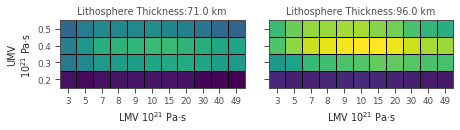

In [41]:
fig=plot_status(comp3,experiments,'weight')

In [455]:
# fig.savefig('Weights_HOL.pdf', bbox_inches="tight", dpi=300)

## RMSE check
Generally the weights should correlate well with the rmse of index points. Let's check!

In [42]:
for i,k in enumerate(models_to_run):
    clear_output(wait=True)
    print("running simulation number " + str(i + 1) + " of " + str(len(models_to_run)))
    print("running model: " + k)
    
    GIA_MODEL = models[k]
    ESL_CURVE = np.copy(Wael)

    z_functions = interpolation_functions_holocene(
        data2["lat"].values, data2["lon"].values, GIA_MODEL
    )
    
    e = np.array([fun(age) for fun,age in zip(z_functions,data2['age'])])
    o = data2['elevation'].values
    r = (e-o)**2
    mse = np.sum(r)/r.size
    rmse = mse**(1/2)
   
    comp3.at[k,'rmse'] = rmse
    


running simulation number 88 of 88
running model: output_d6g_h6g_l96C.ump3.lm9


Text(0.5, 0, 'RMSE of index points')

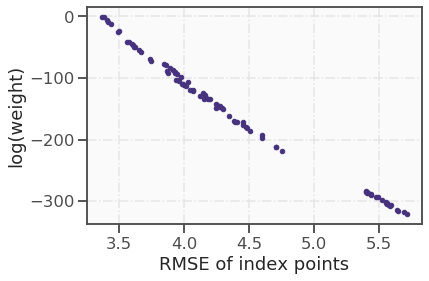

In [43]:
sns.set_context('talk')
plt.plot(comp3['rmse'],np.log(comp3['weight'].astype(float)),'.')
plt.gca().set_ylabel('log(weight)')
plt.gca().set_xlabel('RMSE of index points')

## Log marginal likelihood using empirical bayes

In [22]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel
models_to_run = [m for m in model_names if (('l71' in m) or ('l96' in m))]

In [19]:
data2 = data.copy()

In [20]:
data2['lon']=[a+360 if a<0 else a for a in data2['lon']]

In [37]:
lml = {}
i=0
for k in models_to_run:
    clear_output(wait=True)
    print("running simulation number " + str(i + 1) + " of " + str(len(models_to_run)))
    print("running model: " + k)
    GIA_MODEL = models[k]
    z_functions = interpolation_functions_holocene(
        data2["lat"].values, data2["lon"].values, GIA_MODEL
    )

    e = np.array([fun(age) for fun,age in zip(z_functions,data2['age'])])
    o = data2['elevation'].values
    r = e-o

    kernel = ConstantKernel(constant_value=0)

    gpr = GaussianProcessRegressor(kernel=kernel,
             random_state=0, alpha=data2['elevation_uncertainty']**2)

    gpr = gpr.fit(data2['age'], r)
    lml[k]=gpr.log_marginal_likelihood_value_
    i+=1

running simulation number 88 of 88
running model: output_d6g_h6g_l96C.ump3.lm9


In [41]:
# compare_model_names = comp.index.values
model_params_df = {}
for key in lml.keys():

    
    ice_history = key.split("_")[2]
    esl_curve = key.split("_")[3]
    deglacial_rate = 'S'
    if key.split("lm")[1] != 'VM5':
        lmv=float(key.split("lm")[1]) * 10 ** 21
        umv=float(key.split("ump")[1][0])/10 * 10 ** 21
        lith=float(key.split("l")[1][:2])
    model_params_df[key] = [
        lml[key],
        lmv,
        umv,
        lith,
        ice_history,
        esl_curve,
        deglacial_rate,
    ]

df2 = pd.DataFrame.from_dict(
    model_params_df,
    orient="index",
    columns=["likelihood","LMV", "UMV", "lithosphere", "ice_history", "esl_curve", "deglacial_rate"],
)


In [42]:
comp_sorted=df2.sort_index()
A=comp_sorted['ice_history'].unique()
B=comp_sorted['deglacial_rate'].unique()
C=comp_sorted['lithosphere'].unique()
experiments=list(itertools.product(*[A,B,C]))

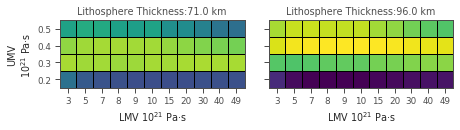

In [45]:
fig=plot_status(df2,experiments,'likelihood')

In [29]:
# df2.sort_values('likelihood',ascending=False)